# Multiple Linear Regression

## Imports

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Normal distribution

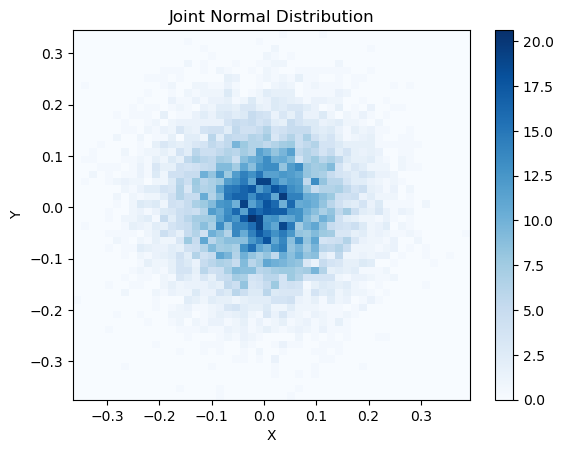

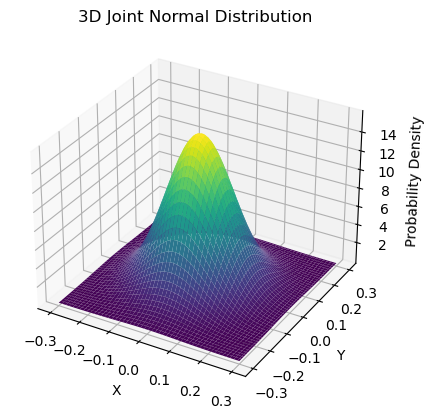

In [5]:
# Generate data for two normal distributions
mu_x, sigma_x = 0, 0.1  # mean and standard deviation for x
mu_y, sigma_y = 0, 0.1  # mean and standard deviation for y
x_samples = np.random.normal(mu_x, sigma_x, 10000)
y_samples = np.random.normal(mu_y, sigma_y, 10000)

# Create a 2D histogram to visualize the joint normal distribution
plt.hist2d(x_samples, y_samples, bins=50, density=True, cmap="Blues")

# Add color bar
plt.colorbar()

plt.title("Joint Normal Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Create a 3D plot for the joint normal distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Create a meshgrid for x and y
x_range = np.linspace(-0.3, 0.3, 100)
y_range = np.linspace(-0.3, 0.3, 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Calculate the joint normal distribution
z_mesh = np.exp(-0.5 * ((x_mesh - mu_x)**2 / sigma_x**2 + (y_mesh - mu_y)**2 / sigma_y**2)) / (2 * np.pi * sigma_x * sigma_y)

# Plot the surface
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap="viridis", edgecolor="none")

ax.set_title("3D Joint Normal Distribution")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Probability Density")

plt.show()

## Regression (Hill climbing)

In [6]:
class Point:
    def __init__(self, x1, x2, y):
        self.x1 = x1
        self.x2 = x2
        self.y = y

    def __str__(self):
        return "{0},{1},{2}".format(self.x1, self.x2, self.y)

def plot_multiple_linear_regression(points: Point, b0: float, b1: float, b2: float, loss: float):
    # Extract x1, x2, and y values from points
    x1_vals = np.array([p.x1 for p in points])
    x2_vals = np.array([p.x2 for p in points])
    y_vals = np.array([p.y for p in points])

    # Create a meshgrid for x1 and x2
    x1_range = np.linspace(min(x1_vals), max(x1_vals), 10)
    x2_range = np.linspace(min(x2_vals), max(x2_vals), 10)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

    # Calculate the corresponding y values on the regression plane
    y_mesh = b0 + b1 * x1_mesh + b2 * x2_mesh

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x1_vals, x2_vals, y_vals, color="r", marker="o", label="Data points")
    ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color="b", alpha=0.5, label="Regression plane")

    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Y")
    ax.set_title(f"Multiple Linear Regression | Loss: {loss:.3f}")

    plt.show()

points = [(Point(row.x1, row.x2, row.y)) for index, row in pd.read_csv("multireg_data.txt").iterrows()]

# Building the model y = beta1 + beta2*x1 + beta3*x2
b0 = 0.0
b1 = 0.0
b2 = 0.0

epochs = 10000#100_000  # The number of iterations to perform

n = float(len(points))  # Number of points

best_loss = 10000000000000.0  # Initialize with a really large value

kept_results = [(b0, b1, b2, best_loss)]

for i in range(epochs):

    # Randomly adjust b0, b1, or b2

    random_b = random.choice(range(3))

    random_adjust = np.random.normal()

    if random_b == 0:
        b0 += random_adjust
    elif random_b == 1:
        b1 += random_adjust
    elif random_b == 2:
        b2 += random_adjust

    # Calculate loss, which is total sum squared error
    new_loss = 0.0
    for p in points:
        new_loss += (p.y - (b0 + b1 * p.x1 + b2 * p.x2)) ** 2

    # If loss has improved, keep new values. Otherwise revert.
    if new_loss < best_loss:
        print(f"z = {b0} + {b1}x + {b2}y")
        print(f"loss: {new_loss}   |   best loss: {best_loss} => keep results, repeat process\n\n")
        best_loss = new_loss
        kept_results.append((b0, b1, b2, best_loss))
    else:
        print(f"z = {b0} + {b1}x + {b2}y")
        print(f"loss: {new_loss}   |   best loss: {best_loss} => do not keep results, repeat process\n")
        if random_b == 0:
            b0 -= random_adjust
        elif random_b == 1:
            b1 -= random_adjust
        elif random_b == 2:
            b2 -= random_adjust

print("z = {0} + {1}x + {2}y".format(b0, b1, b2))


z = 0.0 + -0.9385064098307598x + 0.0y
loss: 916226.3116273277   |   best loss: 10000000000000.0 => keep results, repeat process


z = 0.0 + 0.7814573375778748x + 0.0y
loss: 511748.498706388   |   best loss: 916226.3116273277 => keep results, repeat process


z = 0.0 + 0.7814573375778748x + -0.7024665789602043y
loss: 651597.5213505165   |   best loss: 511748.498706388 => do not keep results, repeat process

z = 0.0 + -2.0940021824241715x + 0.0y
loss: 1267771.9061077316   |   best loss: 511748.498706388 => do not keep results, repeat process

z = 0.0 + 0.781457337577875x + 0.3708323580348089y
loss: 445253.16910051345   |   best loss: 511748.498706388 => keep results, repeat process


z = 0.0 + 0.781457337577875x + -0.06376880550054315y
loss: 523693.5845509672   |   best loss: 445253.16910051345 => do not keep results, repeat process

z = 0.0 + 0.781457337577875x + -1.7568899907756443y
loss: 895636.4072440015   |   best loss: 445253.16910051345 => do not keep results, repeat process

z = 

## Result visualization

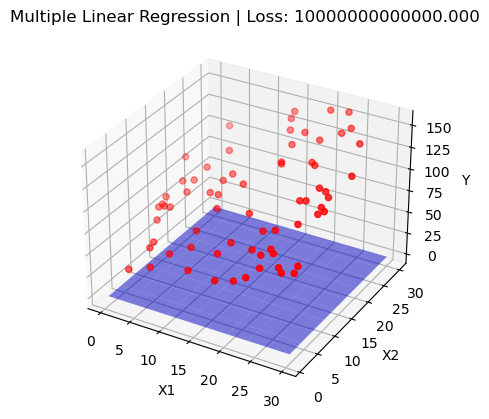

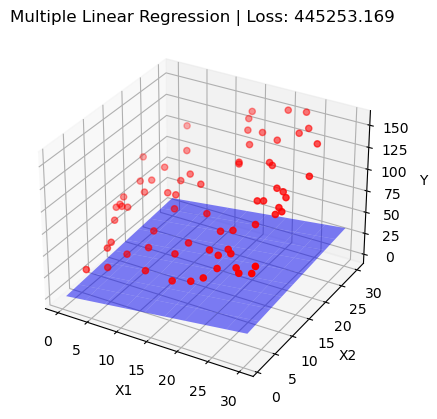

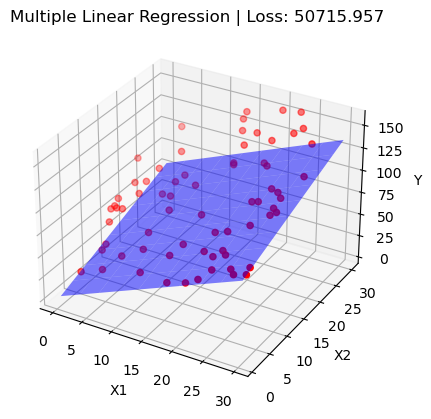

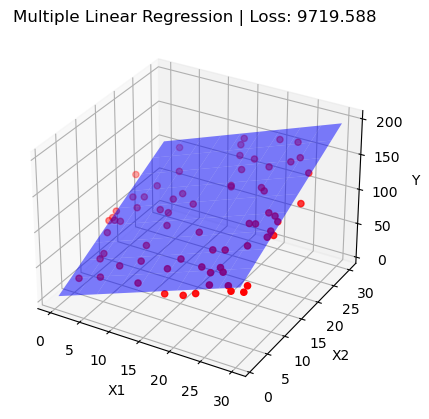

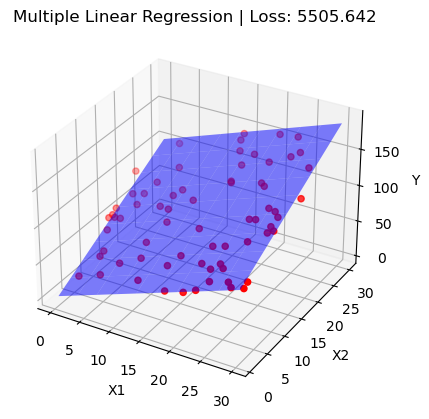

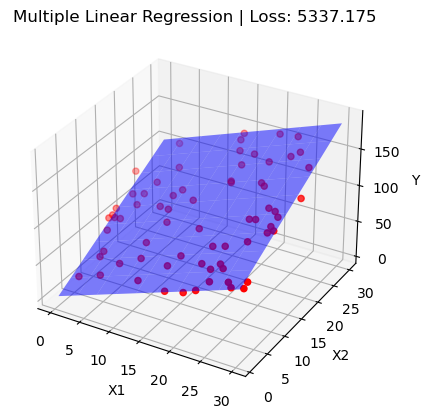

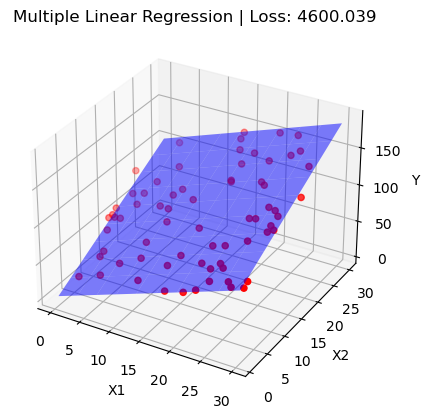

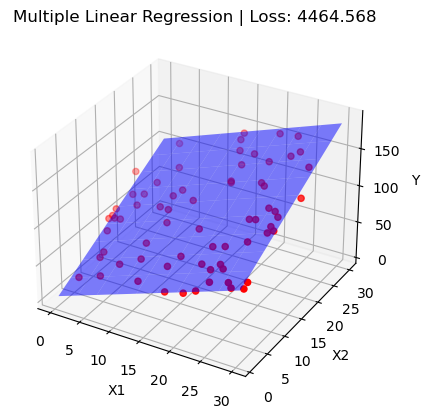

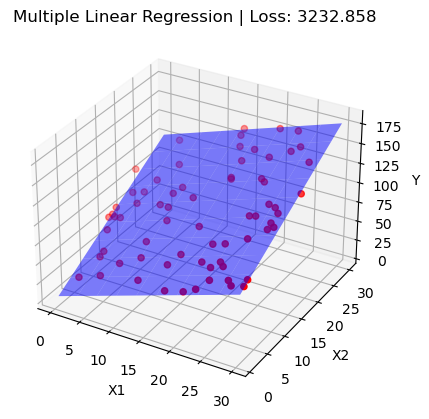

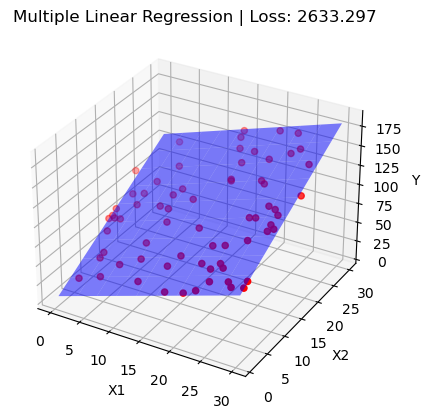

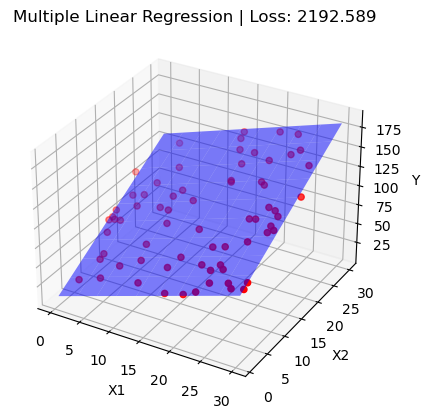

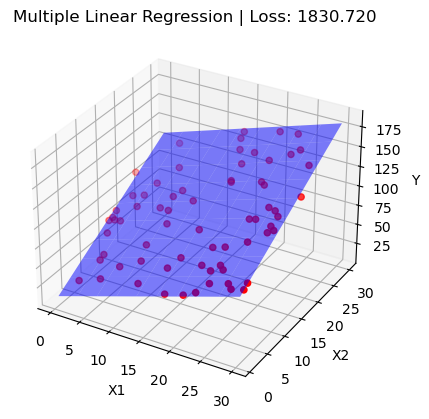

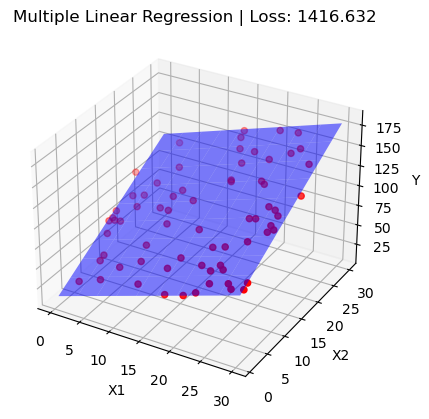

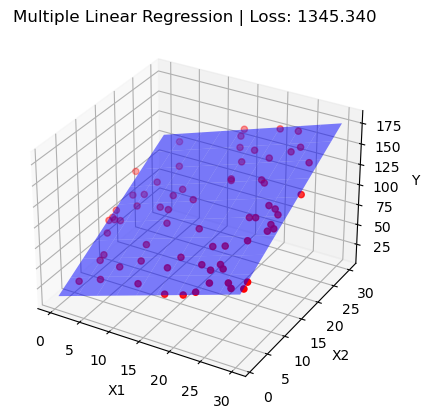

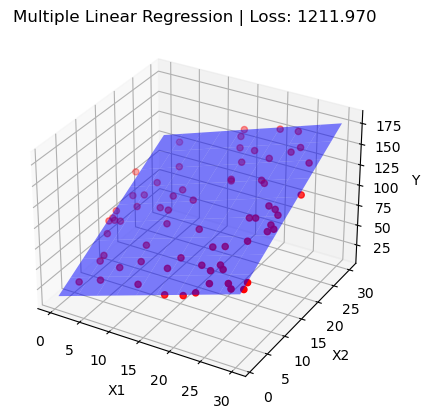

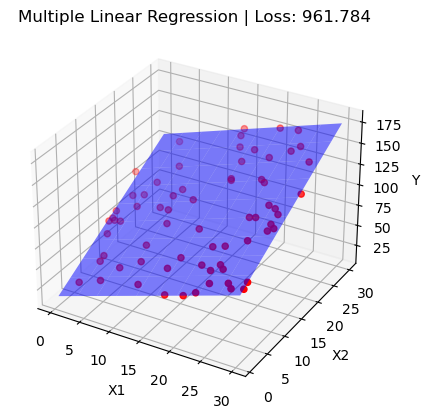

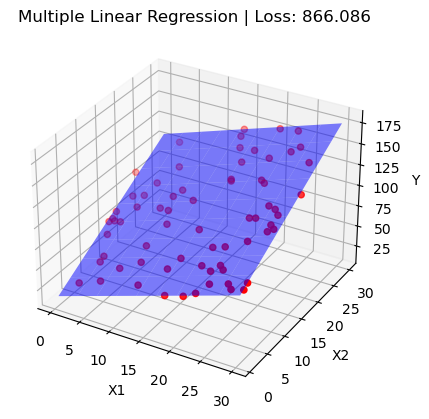

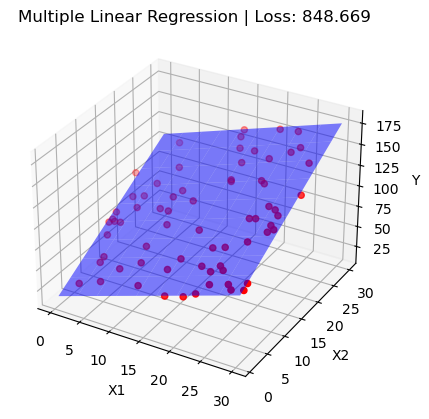

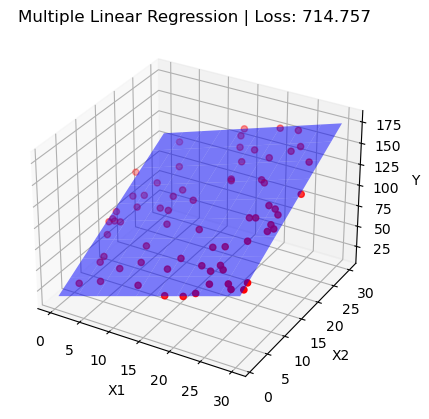

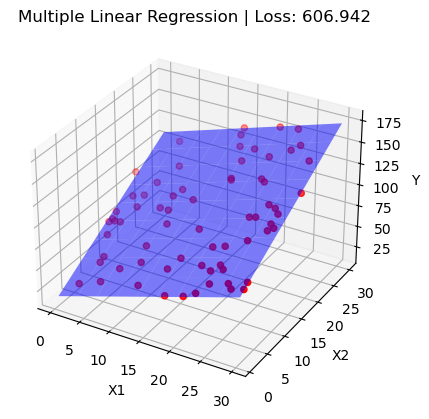

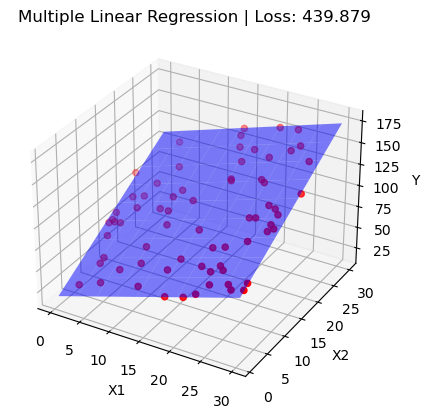

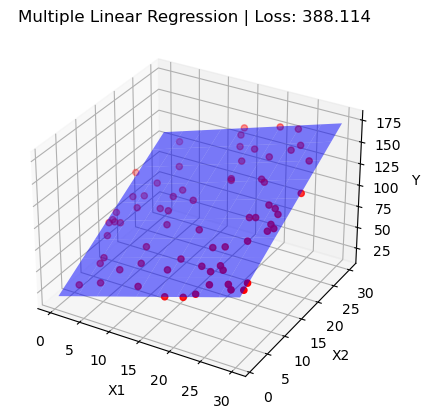

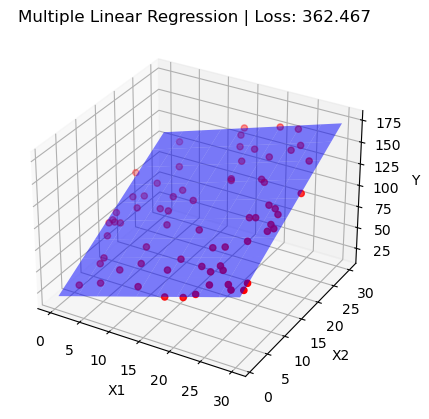

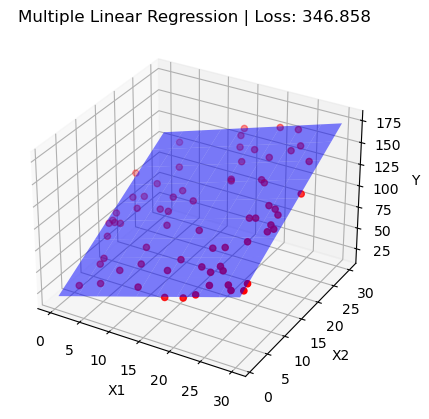

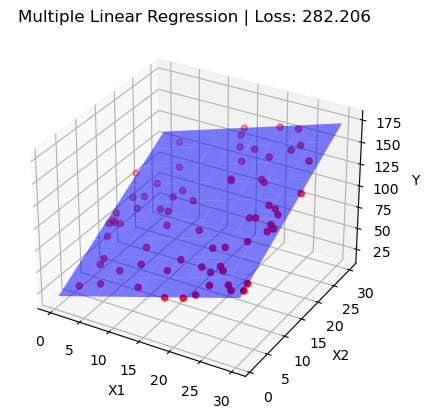

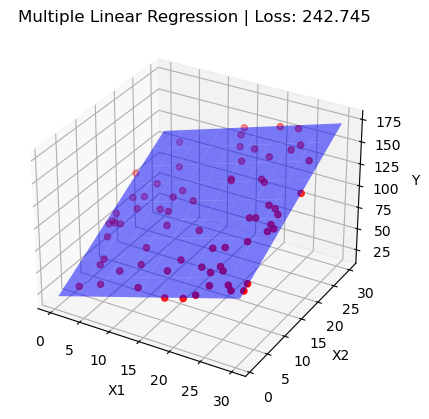

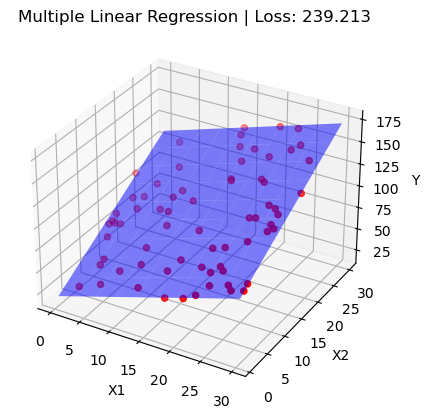

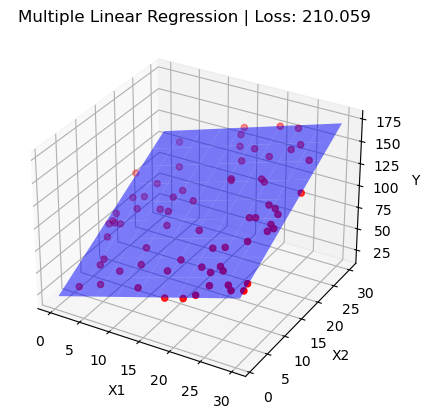

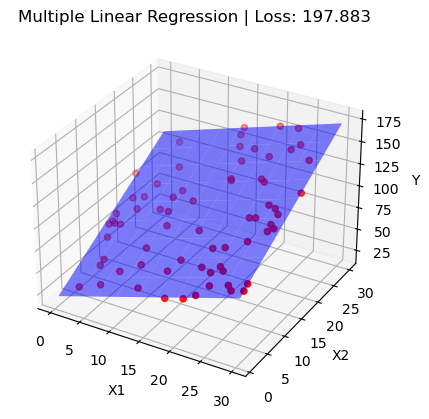

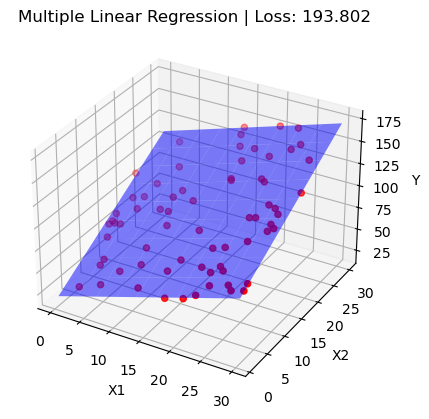

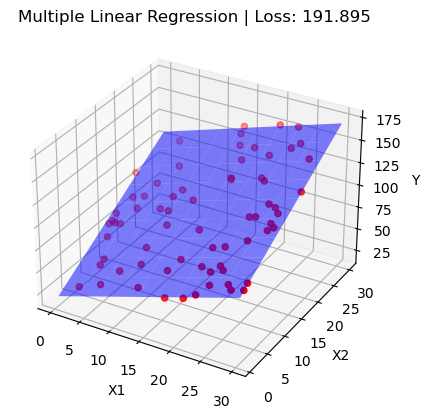

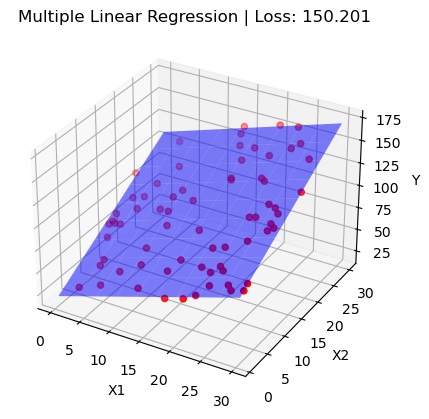

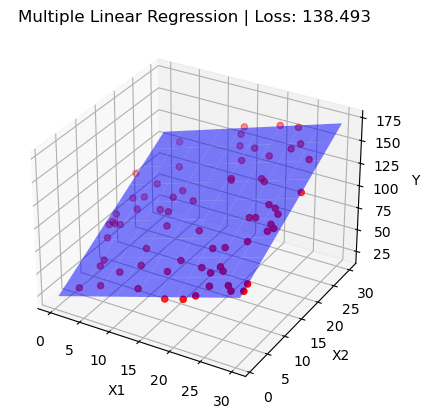

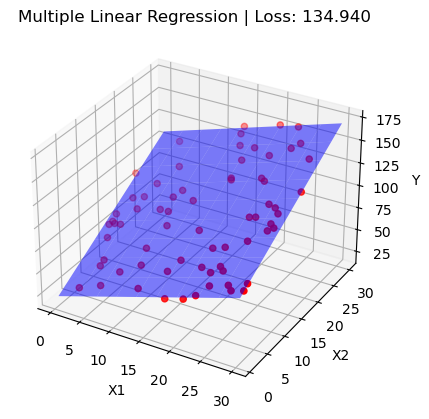

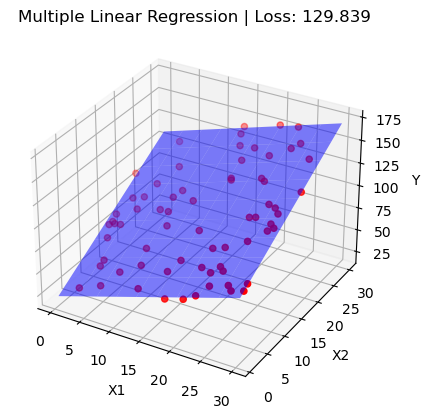

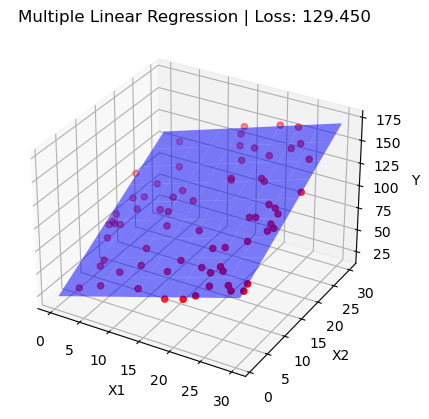

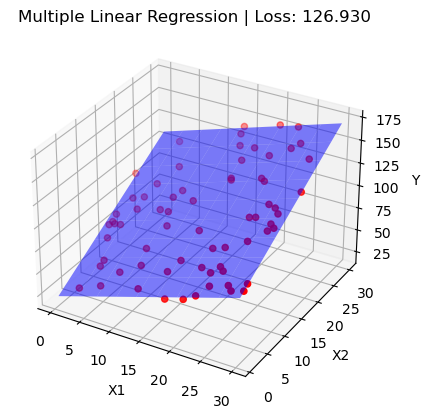

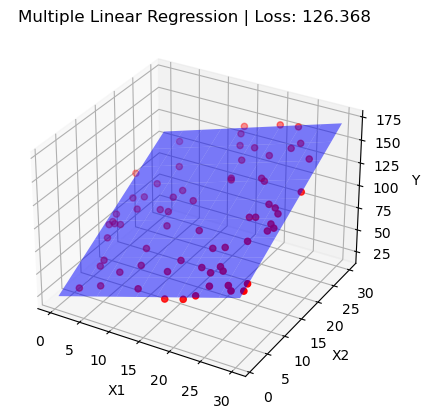

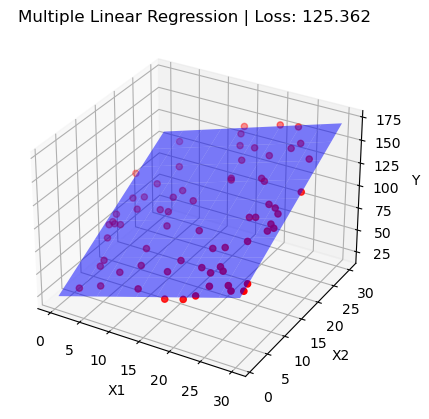

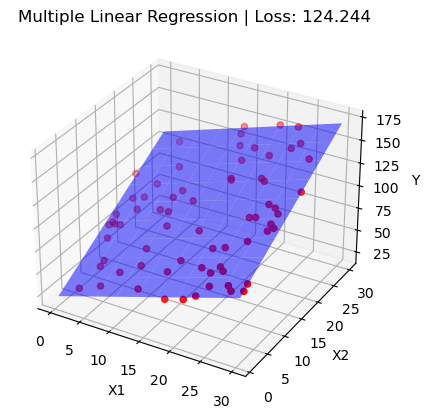

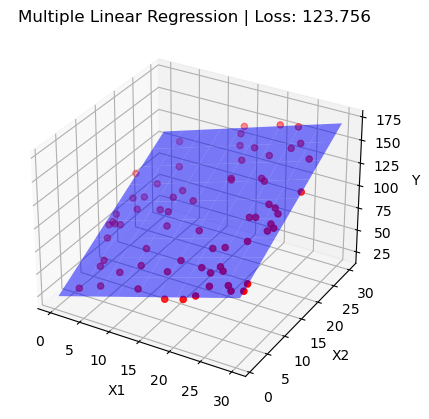

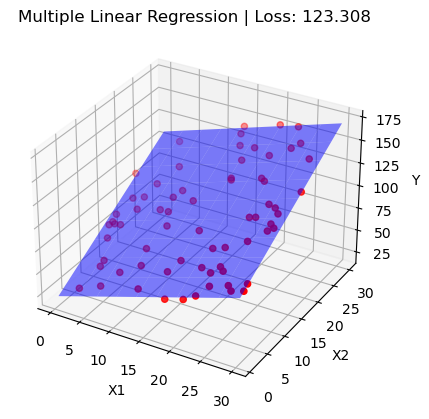

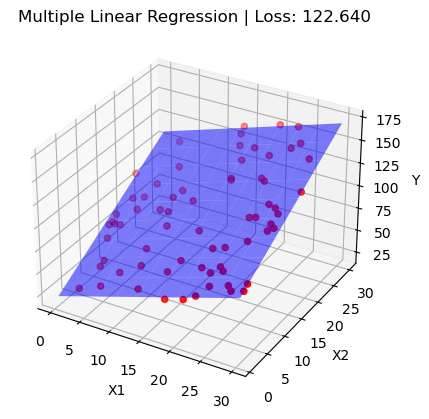

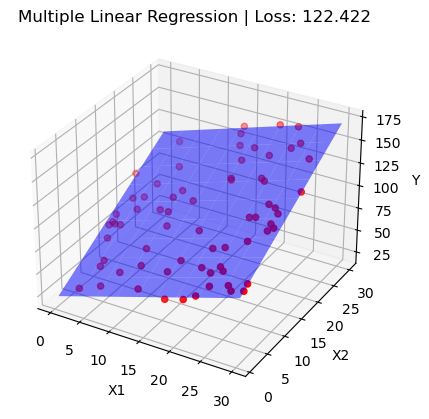

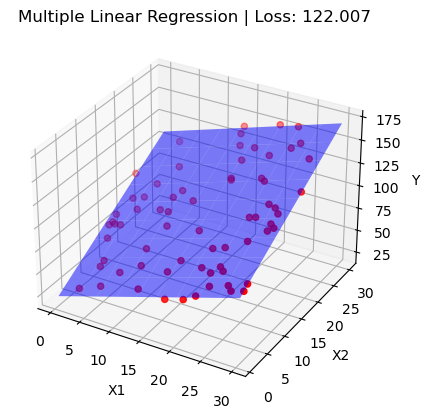

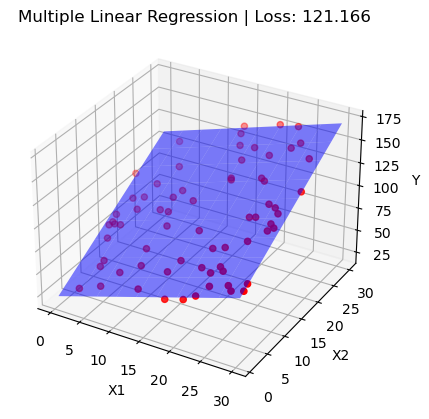

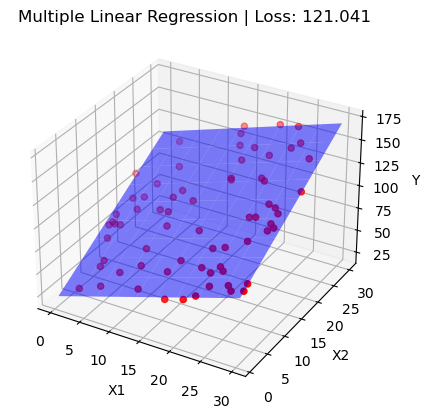

In [7]:
for i, (b0, b1, b2, loss) in enumerate(kept_results):
    if i % 3 == 0:
        plot_multiple_linear_regression(points, b0, b1, b2, loss)